# Arbitrage Reality Check

This notebook explores when theoretical arbitrage opportunities break down under real-world trading frictions: slippage, fees, and latency. We simulate different scenarios to understand how often arbitrage remains profitable when faced with market dynamics.

## Setup: Libraries and Base Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)

def simulate_arbitrage(price_a, price_b, volume, slippage=0.0, fee=0.0, latency=0, volatility=0.0):
    """Simulate a single arbitrage trade with optional frictions."""
    effective_price_a = price_a * (1 + slippage)
    effective_price_b = price_b * (1 - slippage)

    # Simulate latency with random price drift
    for _ in range(latency):
        drift = np.random.normal(0, volatility)
        effective_price_b += drift  # simulate price change on sell side

    gross_profit = (effective_price_b - effective_price_a) * volume
    net_profit = gross_profit - (fee * 2)  # fee paid on both buy and sell
    return net_profit


## Case 1: Frictionless Arbitrage
Simulates pure arbitrage with no slippage, no fees, and no latency.

In [2]:
profit = simulate_arbitrage(price_a=100, price_b=102, volume=10)
print(f"Net Profit: ${profit:.2f}")

Net Profit: $20.00


## Case 2: Slippage Only
Simulates price impact on large trade sizes.

In [3]:
profit = simulate_arbitrage(price_a=100, price_b=102, volume=10, slippage=0.01)
print(f"Net Profit with Slippage: ${profit:.2f}")

Net Profit with Slippage: $-0.20


## Case 3: Fees Only
Simulates flat transaction costs.

In [4]:
profit = simulate_arbitrage(price_a=100, price_b=102, volume=10, fee=1.0)
print(f"Net Profit with Fees: ${profit:.2f}")

Net Profit with Fees: $18.00


## Case 4: Latency and Price Drift
Adds execution delay and random price changes during latency.

In [5]:
profit = simulate_arbitrage(price_a=100, price_b=102, volume=10, latency=3, volatility=0.5)
print(f"Net Profit with Latency and Volatility: ${profit:.2f}")

Net Profit with Latency and Volatility: $25.03


## Case 5: Combined Real-World Effects
Combines slippage, fees, and latency across 100 simulated arbitrage attempts.

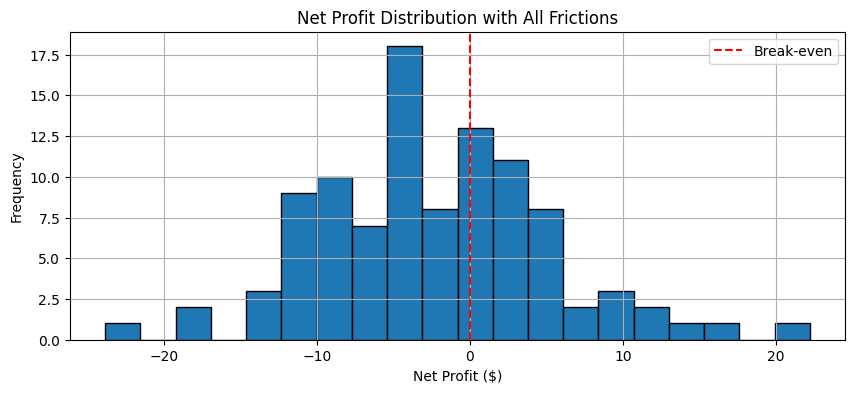

Profitable Trades: 37/100


In [6]:
profits = []
for _ in range(100):
    profit = simulate_arbitrage(
        price_a=100, price_b=102, volume=10,
        slippage=0.01, fee=1.0, latency=3, volatility=0.5
    )
    profits.append(profit)

plt.figure(figsize=(10, 4))
plt.hist(profits, bins=20, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.title("Net Profit Distribution with All Frictions")
plt.xlabel("Net Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig("images/net-profit-histogram.png")
plt.show()

positive_trades = sum(p > 0 for p in profits)
print(f"Profitable Trades: {positive_trades}/100")

## Conclusion

This simulation illustrates that while arbitrage appears risk-free in theory, real-world trading frictions like slippage, fees, and latency can erode or eliminate profitability. As more frictions are layered on, the arbitrage becomes probabilistic rather than guaranteed, and a meaningful portion of trades can become unprofitable.